### Heuristics

- A heuristic is a strategy, a practical approach to find the solution to a complex problem or an uncertain situation.
- Heuristics are not necessary guaranteed to be optimal or perfect.
- Heuristics involve using rules of thumb, educated guesses, past experiences, or common sense to make informed decisions or reach solutions, typically without an exhaustive analysis of all possible alternatives. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Example. 

Heuristic to estimate the value of $\pi=3.141592\dots$

- our heuristic is to compute the relation between the areas of the circle and the square shown in the figure. We have a circle of radius 0.5, enclosed by a 1 × 1 square, both centered at (0, 0). The area of the circle is $\pi\,r^2=\pi/4$ and the area of the square is 1. If we divide the area of the circle, by the area of the square we get $\pi/4$

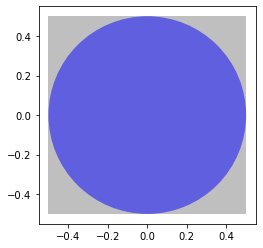

In [2]:
plt.axes()
rectangle = plt.Rectangle((-0.5, -0.5), 1, 1, fc = 'gray', alpha = 0.5)
plt.gca().add_patch(rectangle)
circle = plt.Circle((0, 0), 0.5, fc = 'blue', alpha = 0.5)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

- We generate a large number of uniformly distributed random points in any position within the square. We keep track of the total number of points generated $N_{total}$, and the number of points that fall inside the circle $N_{in}$. The relation $N_{in}/N_{total}$ should be an approximation of the ratio of the areas we calculated above,

$$\frac{N_{in}}{N_{total}}\approx\frac{\pi}{4}$$

- consequently, we can get an approximate value of $\pi$ as
$$\pi = 4\,\frac{N_{in}}{N_{total}}$$

In [3]:
np.pi

3.141592653589793

In [4]:
n_in, pi2d = 0, []
for i in range(1, 2000):
    if np.sqrt(np.sum(np.random.rand(2)**2)) <= 1:
        n_in += 1
    pi2d.append(4 *n_in/i)

In [5]:
np.round(pi2d[-1], 4)

3.1856

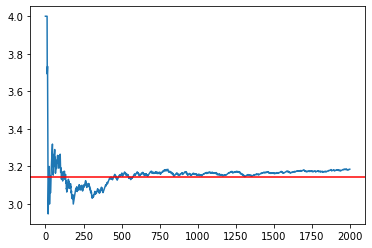

In [6]:
plt.plot(pi2d)
plt.axhline(y =np.pi, c = 'r');

##### can we improve our estimation by increasing the number of iterations ?

In [7]:
#import time
n_in, pi = 0, 1
for i in range(1, 1000000):
    if np.sqrt(np.sum(np.random.rand(2)**2)) <= 1:
        n_in += 1
    if not i %1000:
        pi = 4 *n_in/i
        print('+++ %3d, %8.6f' %(i, pi), end = '\r')
        #time.sleep(0.01)

In [8]:
pi

3.139991991991992

### The curse of dimensionality

- The *curse of dimensionalit* refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces.

- A practical consequence is that the number of samples required to estimate an arbitrary function with a given level of accuracy grows exponentially with respect to the number of input variables (i.e.dimensionality)

- As en example, we follow the same heuristic defined above to obtain an estimate of $\pi$ for increasing number of dimensions.

- Les dades que necessitem per cobrir una dimensió més. És molt més elevat, si per cubrir un cuadrat necessitem x*x, per cobrir-ho a per 3d necessitarem x * x * x. Augmenta exponencialment.
- Com més alta sigui la dimensionalitat de les dades, més registres necessitem per cobrir tots els casos. 

#### Estimate of $\pi$ in 3 dimensions

- The volum of a sphere enclosed in a cube of side $2\,r$ is $V_{sphere} = 4/3\,\pi\,r^3$, while the volume of the cub is $V_{cube}=\left(2\,r\right)^3$.
- Thus, in 3D we have:
$$\frac{N_{in}}{N_{total}}\approx \frac{4/3\,\pi\,r^3}{8\,r^3}\approx \frac{1}{6}\pi$$
- therefore,
$$\pi\approx 6\,\frac{N_{in}}{N_{total}}$$

In [9]:
n_in, pi3d = 0, []
for i in range(1, 2000):
    if np.sqrt(np.sum(np.random.rand(3)**2)) <= 1:
        n_in += 1
    pi3d.append(6 *n_in/i)

In [10]:
np.round(pi2d[-1], 4), np.round(pi3d[-1],4)

(3.1856, 3.1936)

#### Estimate of $\pi$ in 4 dimensions

- The volum of a hyper-sphere enclosed in a hyper-cube of side $2\,r$ is $V_{sphere} = 1/2\,\pi^2\,r^4$, while the volume of the cub is $V_{cube}=\left(2\,r\right)^4$.
- Thus, in 3D we have:
$$\frac{N_{in}}{N_{total}}\approx \frac{1/2\,\pi^2\,r^4}{16\,r^4}\approx \frac{1}{32}\pi^2$$
- therefore,
$$\pi\approx \sqrt{32\,\frac{N_{in}}{N_{total}}}$$

In [11]:
%%time
n_in, pi4d = 0, []
for i in range(1, 2000):
    if np.sqrt(np.sum(np.random.rand(4)**2)) <= 1:
        n_in += 1
    pi4d.append(np.sqrt(32 *n_in/i))

CPU times: user 27.3 ms, sys: 15.8 ms, total: 43.1 ms
Wall time: 39 ms


In [12]:
np.round(pi2d[-1], 4), np.round(pi3d[-1], 4), np.round(pi4d[-1], 4)

(3.1856, 3.1936, 3.0706)

##### Estimate of $\pi$ in 5 dimensions

$$\pi\approx \left(60\,\frac{N_{in}}{N_{total}}\right)^{1/2}$$

In [13]:
%%time
n_in, pi5d = 0, []
for i in range(1, 2000):
    if np.sqrt(np.sum(np.random.rand(5)**2)) <= 1:
        n_in += 1
    pi5d.append((60 *n_in/i)**(1/2))

CPU times: user 37.6 ms, sys: 68 µs, total: 37.6 ms
Wall time: 40.8 ms


In [14]:
np.round(pi2d[-1], 4), np.round(pi3d[-1], 4), np.round(pi4d[-1], 4), np.round(pi5d[-1], 4)

(3.1856, 3.1936, 3.0706, 3.0943)

##### Estimate of $\pi$ in 6 dimensions

$$\pi\approx \left(384\,\frac{N_{in}}{N_{total}}\right)^{1/3}$$

In [15]:
%%time
n_in, pi6d = 0, []
for i in range(1, 2000):
    if np.sqrt(np.sum(np.random.rand(6)**2)) <= 1:
        n_in += 1
    pi6d.append((384 *n_in/i)**(1/3))

CPU times: user 38.1 ms, sys: 3.34 ms, total: 41.4 ms
Wall time: 39.4 ms


In [16]:
np.round(pi2d[-1], 4), np.round(pi3d[-1], 4), np.round(pi4d[-1], 4), np.round(pi5d[-1], 4), np.round(pi6d[-1], 4)

(3.1856, 3.1936, 3.0706, 3.0943, 3.2877)

- No sembla que se'n va molt del valor que estem intentant estimar. 
- Perquè nomès fem 1 estimació. 
- Més que mirar si el valor que estimem s'aproxima a pi. Mirarem si donades n estimacions. si fem no 1, sino 100 vegades. quina variabilitat hi ha entre els valors que estimem. 
- Hauríem de veure si amb 2d fem una estimació més acurada, tots els 100 valors s'han d'apropar i com + dimensions, la variabilitat serà més gran. (ha de tenir més/menys variança). &rarr; mirar al notebook 31. 